In [4]:
import os
import tarfile

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from six.moves import urllib
from zlib import crc32

from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
from sklearn.impute import SimpleImputer

from pandas.plotting import scatter_matrix

%matplotlib inline

In [5]:
RUTA_DESCARGA = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
RUTA_HOUSING = os.path.join("datasets","housing")
URL_HOUSING = RUTA_DESCARGA + "datasets/housing/housing.tgz"

def obtener_housing_data(url_housing=URL_HOUSING, ruta_housing=RUTA_HOUSING):
    if not os.path.isdir(ruta_housing):
        os.makedirs(ruta_housing)
    ruta_tgz = os.path.join(ruta_housing, "housing.tgz")
    urllib.request.urlretrieve(url_housing, ruta_tgz)
    housing_tgz = tarfile.open(ruta_tgz)
    housing_tgz.extractall(path=ruta_housing)
    housing_tgz.close()
    print("Completado")

In [6]:
def load_housing_data(ruta_housing=RUTA_HOUSING):
    csv_ruta = os.path.join(ruta_housing, "housing.csv")
    return pd.read_csv(csv_ruta)

In [7]:
housing = load_housing_data()
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


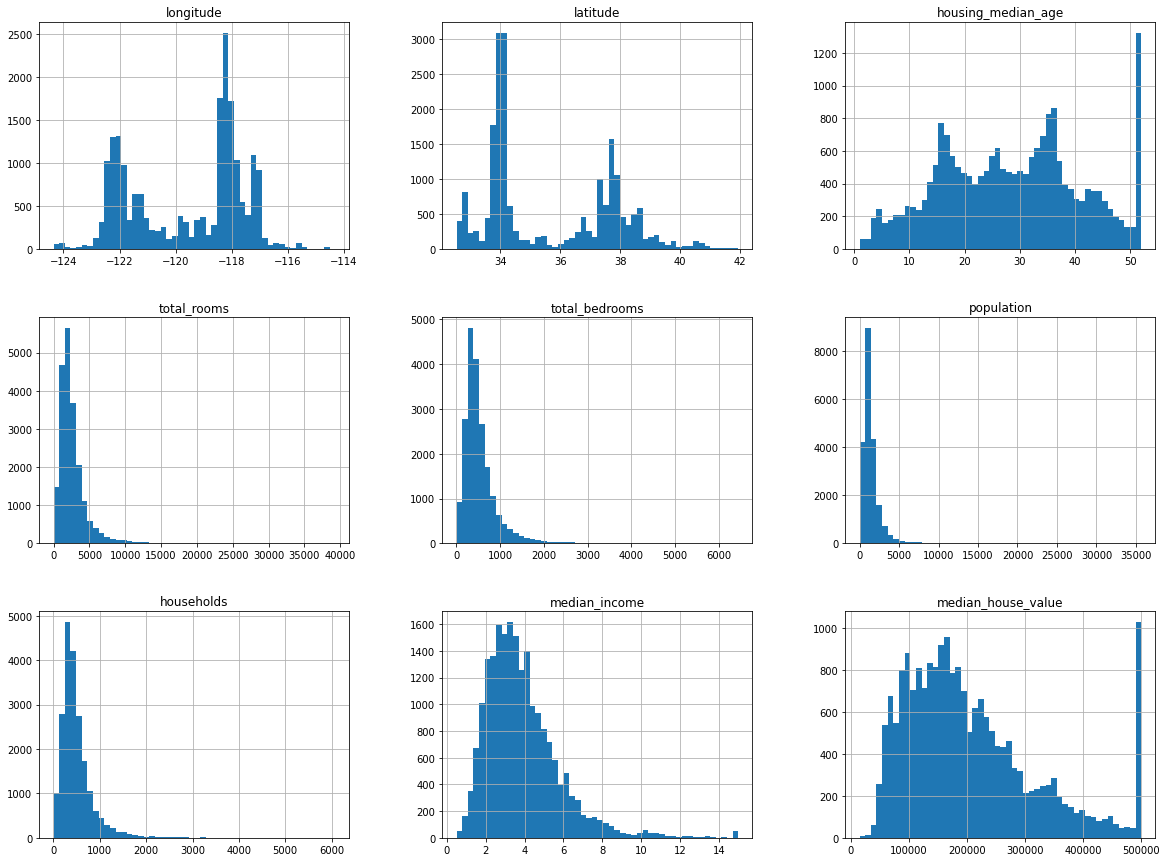

In [8]:
housing.hist(bins=50, figsize=(20,15))
plt.show()

# En el histrograma del ingreso medio los números representan
# aproximadamente decenas de miles de dólares.

# También se limitaron la edad media de la vivienda y el valor 
# medio de la vivienda. Este último puede ser un problema grave, 
# ya que es su atributo de destino.

In [9]:
def split_train_test(data, test_radio):
    indices_barajados = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_radio)
    test_indices = indices_barajados[:test_set_size]
    train_indices = indices_barajados[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

# train_set, test_set = split_train_test(housing, 0.2)
# print(len(train_set))
# print(len(test_set))

In [10]:
def test_set_check(identifier, test_ratio):
    return crc32(np.int64(identifier)) & 0xffffffff < test_ratio * 2**32

def split_train_test_by_id(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]

#housing_con_id = housing.reset_index() # agrega columna de indice

#housing_con_id["id"] = housing["longitude"] * 1000 + housing["latitude"]
#train_set, test_set = split_train_test_by_id(housing_con_id, 0.2, "id")

In [11]:
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)
train_set

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
14196,-117.03,32.71,33.0,3126.0,627.0,2300.0,623.0,3.2596,103000.0,NEAR OCEAN
8267,-118.16,33.77,49.0,3382.0,787.0,1314.0,756.0,3.8125,382100.0,NEAR OCEAN
17445,-120.48,34.66,4.0,1897.0,331.0,915.0,336.0,4.1563,172600.0,NEAR OCEAN
14265,-117.11,32.69,36.0,1421.0,367.0,1418.0,355.0,1.9425,93400.0,NEAR OCEAN
2271,-119.80,36.78,43.0,2382.0,431.0,874.0,380.0,3.5542,96500.0,INLAND
...,...,...,...,...,...,...,...,...,...,...
11284,-117.96,33.78,35.0,1330.0,201.0,658.0,217.0,6.3700,229200.0,<1H OCEAN
11964,-117.43,34.02,33.0,3084.0,570.0,1753.0,449.0,3.0500,97800.0,INLAND
5390,-118.38,34.03,36.0,2101.0,569.0,1756.0,527.0,2.9344,222100.0,<1H OCEAN
860,-121.96,37.58,15.0,3575.0,597.0,1777.0,559.0,5.7192,283500.0,<1H OCEAN


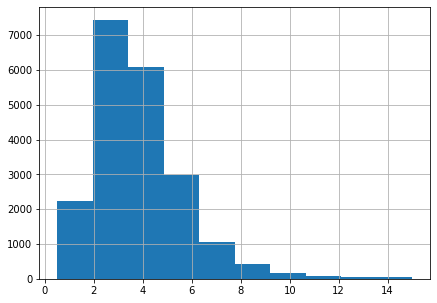

In [12]:
housing["median_income"].hist(figsize=(7,5))
plt.show()

<AxesSubplot:>

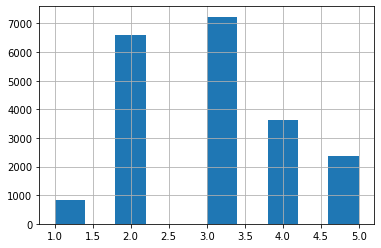

In [13]:
housing["income_catg"] = pd.cut(housing["median_income"],
                                bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                                labels=[1,2,3,4,5])

housing["income_catg"].hist()

In [14]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index, test_index in split.split(housing, housing["income_catg"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [15]:
strat_test_set["income_catg"].value_counts()/len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114583
1    0.039729
Name: income_catg, dtype: float64

In [16]:
strat_test_set["median_income"].describe()

count    4128.000000
mean        3.850998
std         1.879270
min         0.499900
25%         2.543000
50%         3.514750
75%         4.739700
max        15.000100
Name: median_income, dtype: float64

In [17]:
housing["median_income"].describe()

count    20640.000000
mean         3.870671
std          1.899822
min          0.499900
25%          2.563400
50%          3.534800
75%          4.743250
max         15.000100
Name: median_income, dtype: float64

In [18]:
#for set_ in (strat_train_set, strat_test_set):
#    set_.drop("income_catg", axis=1, inplace=True)

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

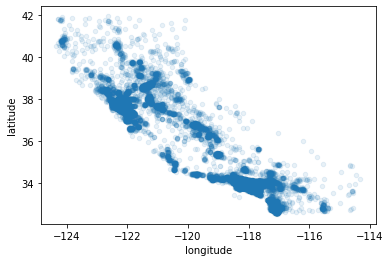

In [19]:
housing_copy = strat_train_set.copy()

housing_copy.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)

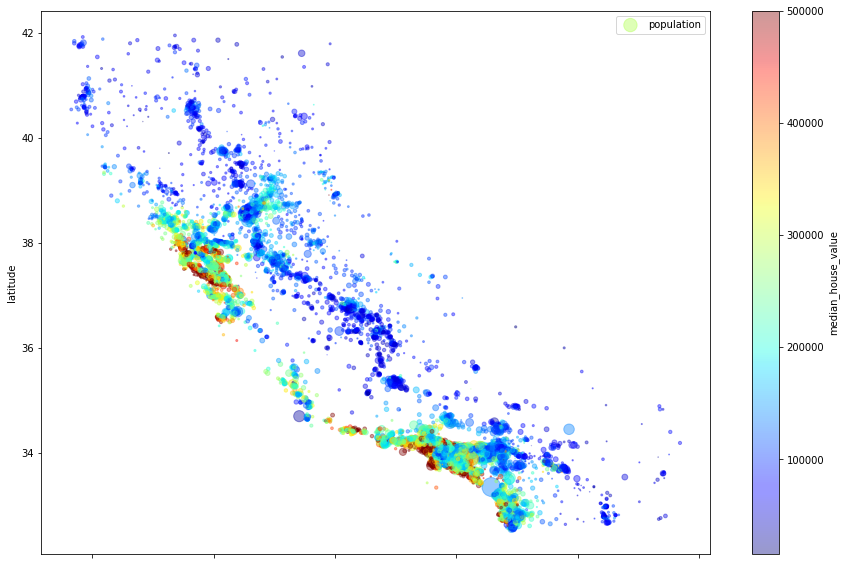

In [42]:
housing_copy.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
    s=housing_copy["population"]/100, label="population", figsize=(15,10),
    c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True
)

plt.legend()
plt.show()

In [21]:
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

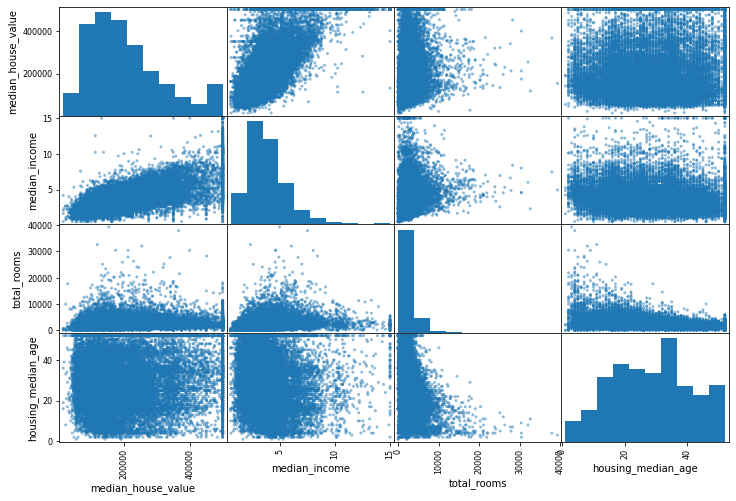

In [22]:
atributos = ["median_house_value", "median_income", "total_rooms",
             "housing_median_age"]

scatter_matrix(housing[atributos], figsize=(12, 8))
plt.show()

<AxesSubplot:xlabel='median_income', ylabel='median_house_value'>

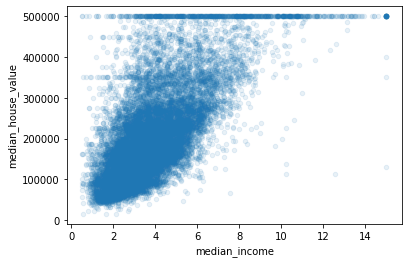

In [23]:
housing_copy.plot(kind="scatter", x="median_income", y="median_house_value",
            alpha=0.1)

In [24]:
housing_copy["rooms_per_household"] = housing_copy["total_rooms"]/housing_copy["households"]
housing_copy["bedrooms_per_room"] = housing_copy["total_bedrooms"]/housing_copy["total_rooms"]
housing_copy["population_per_household"]=housing_copy["population"]/housing_copy["households"]

In [25]:
corr_matrix = housing_copy.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687160
rooms_per_household         0.146285
total_rooms                 0.135097
housing_median_age          0.114110
households                  0.064506
total_bedrooms              0.047689
population_per_household   -0.021985
population                 -0.026920
longitude                  -0.047432
latitude                   -0.142724
bedrooms_per_room          -0.259984
Name: median_house_value, dtype: float64

In [26]:
_housing = strat_train_set.drop("median_house_value", axis=1)
_housing_labels = strat_train_set["median_house_value"].copy()

In [27]:
# housing.dropna(subset=["total_bedrooms"]) # option 1
# housing.drop("total_bedrooms", axis=1) # option 2
# median = housing["total_bedrooms"].median() # option 3
# housing["total_bedrooms"].fillna(median, inplace=True)

imputer = SimpleImputer(strategy="median")
_housing_num = _housing.drop("ocean_proximity", axis=1)
imputer.fit(_housing_num)
imputer.statistics_


array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409,    3.    ])

In [28]:
_housing_num.median().values

X = imputer.transform(_housing_num)
housing_tr = pd.DataFrame(X, columns=_housing_num.columns)
housing_tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16512 entries, 0 to 16511
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16512 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
 8   income_catg         16512 non-null  float64
dtypes: float64(9)
memory usage: 1.1 MB


Continuamos

In [29]:
housing_cat = _housing[["ocean_proximity"]]
housing_cat.head(10)

,ocean_proximity
17606,<1H OCEAN
18632,<1H OCEAN
14650,NEAR OCEAN
3230,INLAND
3555,<1H OCEAN
19480,INLAND
8879,<1H OCEAN
13685,INLAND
4937,<1H OCEAN
4861,<1H OCEAN


In [30]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()

In [31]:
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:10]

array([[0.],
       [0.],
       [4.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.]])

In [32]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [33]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [34]:
housing_cat_1hot.toarray()

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

In [35]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

Ahora veremos la contruccion de un transformador personalizado estilo sklearn <br> para ello necesitaremos definir las funciones fit, transform y fit_transform

In [36]:
from sklearn.base import BaseEstimator, TransformerMixin

rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True): # no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self # nothing else to do
    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                        bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]
        
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

Importante! solo aplicar transformaciones al dataset de entrenamiento, mas no a todo el data set incluido el dataset de test

<h2><b>Transformation Pipelines(TUBERIAS)</b></h2>

In [47]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('attribs_adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler()),
])

housing_num_tr = num_pipeline.fit_transform(_housing_num)
housing_num_tr

array([[-1.15604281,  0.77194962,  0.74333089, ..., -0.31205452,
        -0.08649871,  0.15531753],
       [-1.17602483,  0.6596948 , -1.1653172 , ...,  0.21768338,
        -0.03353391, -0.83628902],
       [ 1.18684903, -1.34218285,  0.18664186, ..., -0.46531516,
        -0.09240499,  0.4222004 ],
       ...,
       [ 1.58648943, -0.72478134, -1.56295222, ...,  0.3469342 ,
        -0.03055414, -0.52177644],
       [ 0.78221312, -0.85106801,  0.18664186, ...,  0.02499488,
         0.06150916, -0.30340741],
       [-1.43579109,  0.99645926,  1.85670895, ..., -0.22852947,
        -0.09586294,  0.10180567]])

In [59]:
from sklearn.compose import ColumnTransformer

num_attribs = list(_housing_num)
cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", OneHotEncoder(), cat_attribs),
])

housing_prepared = full_pipeline.fit_transform(_housing)

<h2><b>Seleccionando y Entrenando un Modelo</b></h2>
<h3><b>Entrenando y Evaluando en el Training Set</b><h3>

In [61]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, _housing_labels)

LinearRegression()

In [76]:
some_data = _housing.iloc[:5]
some_labels = _housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)
print("Predictions:", lin_reg.predict(some_data_prepared))

Predictions: [203682.37379543 326371.39370781 204218.64588245  58685.4770482
 194213.06443039]


In [77]:
print("Labels:",list(some_labels))

Labels: [286600.0, 340600.0, 196900.0, 46300.0, 254500.0]


In [81]:
from sklearn.metrics import mean_squared_error

housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(_housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68376.64295459937

In [85]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, _housing_labels)

DecisionTreeRegressor()

In [87]:
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(_housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

In [99]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg, housing_prepared, _housing_labels, 
                         scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [100]:
def display_scores(scores):
    print("Scores:",scores)
    print("Media:",scores.mean())
    print("Desviacion estandar:",scores.std())
    
display_scores(tree_rmse_scores)

Scores: [70813.79528612 68046.37934924 71806.77277267 69638.35717116
 70657.9744965  75848.66738979 72421.10956261 72217.52290448
 77813.13567455 70959.43160978]
Media: 72022.31462169121
Desviacion estandar: 2726.924340988995


In [101]:
lin_scores = cross_val_score(lin_reg, housing_prepared, _housing_labels, 
                         scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)

display_scores(lin_rmse_scores)

Scores: [66877.52325028 66608.120256   70575.91118868 74179.94799352
 67683.32205678 71103.16843468 64782.65896552 67711.29940352
 71080.40484136 67687.6384546 ]
Media: 68828.99948449328
Desviacion estandar: 2662.7615706103425


In [103]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared, _housing_labels)

RandomForestRegressor()

In [105]:
housing_predictions = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(_housing_labels, housing_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

18777.016592728905

In [111]:
forest_scores = cross_val_score(forest_reg,housing_prepared, _housing_labels,
                               scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)

In [109]:
display_scores(forest_rmse_scores)

Scores: [49381.18265948 47746.47222846 50408.05351445 52163.39004116
 49526.99737552 53665.83628903 48841.52619198 47928.13272859
 52865.01544998 50276.64692493]
Media: 50280.32534035931
Desviacion estandar: 1926.2370902625923


In [113]:
forest_rmse_scores

array([49356.68239333, 47773.16523144, 49838.13210308, 52312.09749485,
       49685.97324762, 53396.74339773, 49175.97115155, 47989.47963773,
       52645.00244811, 50355.45207067])

In [120]:
# from sklearn.externals import joblib
# import sklearn.externals
# import joblib

# joblib.dump(my_model, "my_model.pkl")
# and later...
# my_model_loaded = joblib.load("my_model.pkl")